## Overview of Monte Carlo Integration
Monte Carlo integration is an integration technique that calculates the value of complex definite integrals which do not have a closed-form solution. Essentially, in a Monte Carlo integration, you choose some $n$ which defines how many partitions you take. As the sample size $n$ increases, the average of the areas of these partitions becomes more and more accurate/close to the exact value. The convergence of the Monte Carlo integration as $n$ goes to $\infty$, the rate of error reaches $0$.

The average value of a function $f$, which solely depends on $x$ is equal to $f_{avg}=\frac{1}{b-a}\int_a^bf(x)$. We can rearrange this as $(b-a)f_{avg}=\int_a^bf(x)$. However, if we try to apply this function with a function $f$ which depends on many parameters, it can become computationaly expensive and time consuming. 
In order to get around this, we apply the law of large numbers and random sampling. This leads us to Monte Carlo Integration. This integration technique is somewhat subpart on single variable integration, but is optiminal with multivariables.

If we want to sketch of the derivation of Monte Carlo Integration, we can see that expanding the equation $(b-a)f_{avg}=\int_a^bf(x)$ gets us $(b-a)\frac{1}{N}\sum f(x_i) \approx \int{a}^{b}f(x)dx$. 

### Developing a Python script
First, I imported a variety of functions:
- Scipy because we need to use the random function in order to choose lengths of the integrating values
- Numpy inorder to allow access to variables such as pi
- Matplotlib in order to develop a graph to visualize the analysis of Monte Carlo Integration

I then used scipy's random function in order to create $N$ random distributions of integration parts on the interval $[a,b]$ (where $a$ and $b$ are inputs the user can change). I then computed the value of the function at each partition and summed all these values together. Finally, I used the above formula with htis new number in order to compute the integral area.

## Monte Carlo for 1-dimensions
The below code is an example for an implementation of Monte Carlo in 1-dimension.

### Example
Evaluate the integral $\int_0^\pi sin(x)dx$.
This is a somewhat trivial example, as we know this is equal to $-cos(x)$ evaluated from $0$ to $\pi$ which is $2$.

In general, you can change the output of the Monte Carlo function by changing the output of the function "function(x)". The provided code runs the previous example for analysis.

In [20]:
%matplotlib inline
from scipy import random
import numpy as np

def function(x):
    return np.sin(x)

def Int(a, b, N, fn): 
    # fn = function evaluating integral for
    # N = number of samples
    # a,b = limits of integration
    xrand = random.uniform(a,b,N) # create a randomly division 
    # let S_n = sum{j=1}^{N} f(U_j)
    integral = 0.0
    for i in range(N):
        integral += fn(xrand[i])
    return (b-a)/float(N)*integral # want to return (b-a) S_n / N

f1 = lambda x : np.sin(x)
f2 = lambda x : 2**x
f3 = lambda x:  x**3

print("The integral from 0 to pi of sin(x) with N=1000: ",Int(0,np.pi,1000,f1))
print("The integral from 0 to 1 of 2^x with N=1000: ",Int(0,1,1000,f2))
print("The integral from 0 to 1 of x^3 with N=1000: ",Int(0,1,1000,f3))

The integral from 0 to pi of sin(x) with N=1000:  2.053356847401461
The integral from 0 to 1 of 2^x with N=1000:  1.4488534173225012
The integral from 0 to 1 of x^3 with N=1000:  0.2618423647725511


We can compare these values to the original values using scipy.

In [21]:
import scipy.integrate as integrate

correctValue1 = integrate.quad(f1,0,np.pi)[0]
correctValue2 = integrate.quad(f2,0,1)[0]
correctValue3 = integrate.quad(f3,0,1)[0]

print(correctValue1)
print(correctValue2)
print(correctValue3)

2.0
1.4426950408889634
0.25


## 1-dimensional Error Analysis
When running the program, note that as $N$ gets larger, the approximation becomes closer to the actual value. Sometimes Monte Carlo integration results in a smaller value, sometimes it results in a larger value. I thought it would be interesting to display these values in a visual representation. Interestingly, the histogram "peaks" around $2$, which is is the exact value of the function. As the number of values increase, we notice that there is more and more of a bell curve. This is the Central Limit Theorem in play.

Text(0.5, 0, 'Areas')

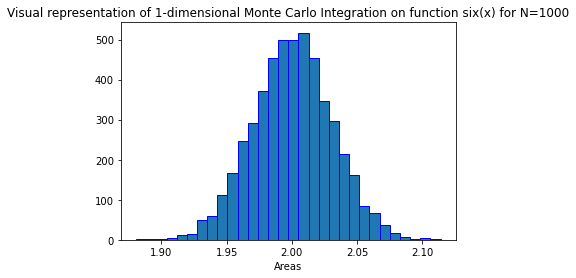

In [5]:
import matplotlib.pyplot as plt

areas1 = []
areas2 = []
areas3 = []

for i in range(5000):
    areas1.append(Int(0,np.pi,1000,f1))
    
plt.title("Visual representation of 1-dimensional Monte Carlo Integration on function six(x) for N=1000")
plt.hist(areas1,bins=30,ec='blue')
plt.xlabel("Areas")

Text(0.5, 0, 'Areas')

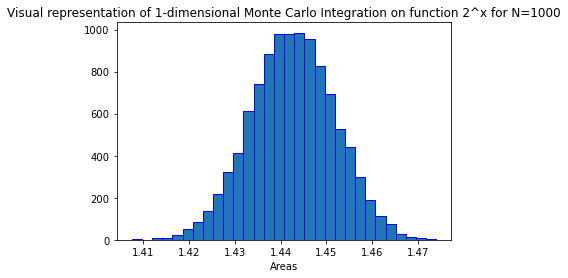

In [11]:
for i in range(5000):
    areas2.append(Int(0,1,1000,f2))

plt.title("Visual representation of 1-dimensional Monte Carlo Integration on function 2^x for N=1000")
plt.hist(areas2,bins=30,ec='blue')
plt.xlabel("Areas")

Text(0.5, 0, 'Areas')

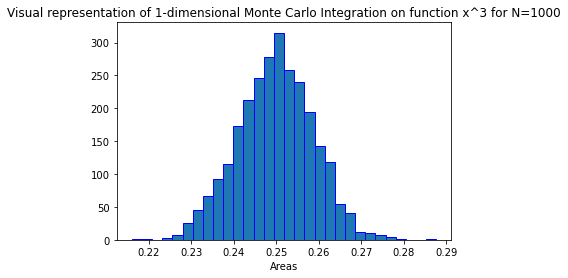

In [9]:
for i in range(1000):
    areas3.append(Int(0,1,1000,f3))

plt.title("Visual representation of 1-dimensional Monte Carlo Integration on function x^3 for N=1000")
plt.hist(areas3,bins=30,ec='blue')
plt.xlabel("Areas")

## Monte Carlo for 2-dimension
Monte Carlo Integration can be extended into higher dimensions. The following code implements Monte Carlo Integration in 2-dimensions.

In [13]:
def Int2(a, b, c, d, N, fn):
    # a, b bounds of integration on x-axis
    # c, d bounds of integration on y-axis
    # N number of partitions
    # fn function we are integrating
    xrand = random.uniform(a,b,N) # creates a random division
    yrand = random.uniform(c,d,N)
    integral = 0.0
    for i in range(N):
        integral += fn(xrand[i],yrand[i])
    return (b-a)*(d-c)/float(N)*integral

### 2-dimension Examples
In the first example, consider a circle.

In the second example, consider $f(x,y)=1$ if $||(x,y)||\leq R$ and $f(x,y)=0$ if $||(x,y)||\geq R$. 

In [31]:
def indCir(r,x,y):
    if x**2 + y **2 < r**2:
        return 1
    else:
        return 0

f4 = lambda x,y : x**2 + y**2
f5 = lambda x,y : indCir(1,x,y)

print(Int2(-2,2,-2,2,5000,f4))
print(Int2(-2,2,-2,2,5000,f5))

43.06572442944435
3.1904000000000003


### 2-Dimensional Error Analysis
Similarily, we can conduct an error analysis on these 2-dimensional functions.

Text(0.5, 0, 'Areas')

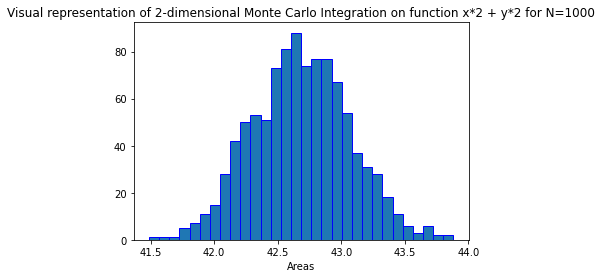

In [26]:
areas4 = []
areas5 = []

for i in range(1000):
    areas4.append(Int2(-2,2,-2,2,5000,f4))

plt.title("Visual representation of 2-dimensional Monte Carlo Integration on function x*2 + y*2 for N=1000")
plt.hist(areas4,bins=30,ec='blue')
plt.xlabel("Areas")

Text(0.5, 0, 'Areas')

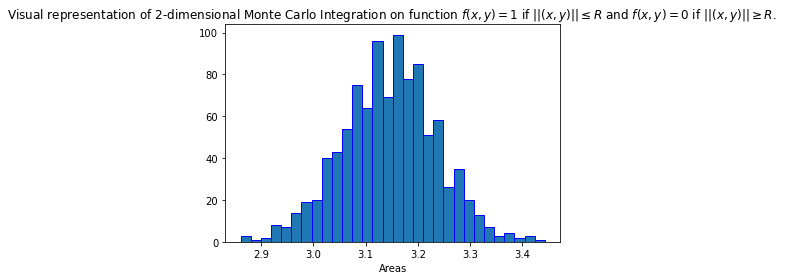

In [27]:
for i in range(1000):
    areas5.append(Int2(-2,2,-2,2,5000,f5))

plt.title("Visual representation of 2-dimensional Monte Carlo Integration on function $f(x,y)=1$ if $||(x,y)||\leq R$ and $f(x,y)=0$ if $||(x,y)||\geq R$. ")
plt.hist(areas5,bins=30,ec='blue')
plt.xlabel("Areas")

## Monte Carlo for 3-dimensions
Finally, we can even implement Monte Carlo Integration for 3-dimensions.

In [16]:
def Int3(a, b, c, d, e, f, N, fn):
    # a, b bounds of integration on x-axis
    # c, d bounds of integration on y-axis
    # e, f bounds of integration on z-axis
    # N number of partitions
    # fn function we are integrating
    xrand = random.uniform(a,b,N) # creates a random division
    yrand = random.uniform(c,d,N)
    zrand = random.uniform(e,f,N)
    integral = 0.0
    for i in range(N):
        integral += fn(xrand[i],yrand[i],zrand[i])
    return (b-a)*(d-c)/float(N)*integral

### 3-Dimensional Examples

In [32]:
f6 = lambda x,y,z : x**2 + y**2 + z**2
f7 = lambda x,y,z : x/2 + y/2 + z/2

print(Int3(-2,2,-2,2,-2,2,10000,f6))
print(Int3(-2,2,-2,2,-2,2,10000,f7))

63.73956556681671
-0.05739399803276597


### 3- Dimensional Error Analysis

Text(0.5, 0, 'Areas')

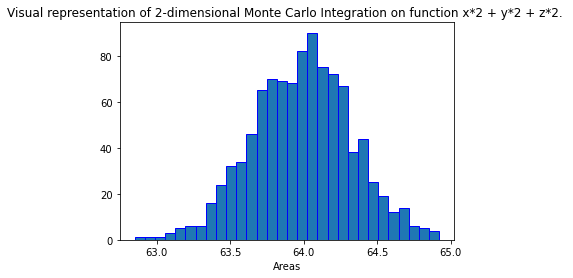

In [34]:
areas6 = []
areas7 = []

for i in range(1000):
    areas6.append(Int3(-2,2,-2,2,-2,2,10000,f6))

plt.title("Visual representation of 2-dimensional Monte Carlo Integration on function x*2 + y*2 + z*2. ")
plt.hist(areas6,bins=30,ec='blue')
plt.xlabel("Areas")

Text(0.5, 0, 'Areas')

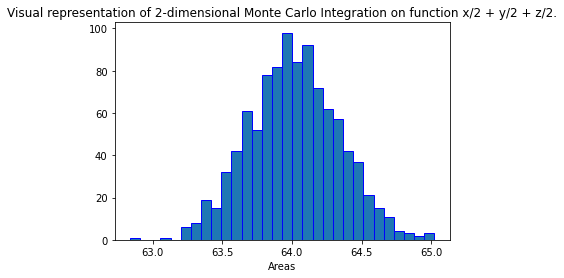

In [35]:
for i in range(1000):
    areas7.append(Int3(-2,2,-2,2,-2,2,10000,f6))

plt.title("Visual representation of 2-dimensional Monte Carlo Integration on function x/2 + y/2 + z/2.")
plt.hist(areas7,bins=30,ec='blue')
plt.xlabel("Areas")